# Final assignment

39246233 Seiichi Takeuchi, M1

## 1. Introduction

I analyzed how class assignments in kindergarten affected test scores using data from Project STAR. The following part is the information for Project STAR (source: https://rdrr.io/cran/AER/man/STAR.html)

    Project STAR (Student/Teacher Achievement Ratio) was a four-year longitudinal class-size study funded by the Tennessee General Assembly and conducted in the late 1980s by the State Department of Education. Over 7,000 students in 79 schools were randomly assigned into one of three interventions: small class (13 to 17 students per teacher), regular class (22 to 25 students per teacher), and regular-with-aide class (22 to 25 students with a full-time teacher's aide). Classroom teachers were also randomly assigned to the classes they would teach. The interventions were initiated as the students entered school in kindergarten and continued through third grade. 

## 2. Prepare the dataset

First, I prepare the dataset to conduct my research. I extracted data related to kindergarden situation.

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/STAR.csv")
df.set_index("Unnamed: 0", inplace=True)

df["birth"] = df["birth"].str.replace(" Q1", ".0").str.replace(" Q2", ".25").str.replace(" Q3", ".5").str.replace(" Q4", ".75").astype(float)
# genderの列の値がfemaleだった場合は0に、maleだった場合は1に変換する
df["gender"] = df['gender'].map({'female': 0, 'male': 1})
# lunchの各列に対して、freeの場合は1に、non-freeの場合は0に変換する
df["lunchk"] = df["lunchk"].map({'non-free': 0, 'free': 1})
df["lunch1"] = df["lunch1"].map({'non-free': 0, 'free': 1})
df["lunch2"] = df["lunch2"].map({'non-free': 0, 'free': 1})
df["lunch3"] = df["lunch3"].map({'non-free': 0, 'free': 1})

# 普遍的なデータが入っているデータフレームを作る
df_basic = df[["gender", "ethnicity", "birth"]]
# 列名の最後がkの列を抽出
df_k = df[[col for col in df.columns if col.endswith("k")]]
# 列名の最後が1の列を抽出
df_1 = df[[col for col in df.columns if col.endswith("1")]]
# 列名の最後が2の列を抽出
df_2 = df[[col for col in df.columns if col.endswith("2")]]
# 列名の最後が3の列を抽出
df_3 = df[[col for col in df.columns if col.endswith("3")]]

# df_basicと、それぞれのデータフレームを結合
df_k = pd.concat([df_basic, df_k], axis=1)
df_1 = pd.concat([df_basic, df_1], axis=1)
df_2 = pd.concat([df_basic, df_2], axis=1)
df_3 = pd.concat([df_basic, df_3], axis=1)

# 欠損値を削除
df_k = df_k.dropna()

## 3. Check randomness of class assignment

Next, verify whether the class assignments are truly random.
If they are randomly assigned, then factors that might influence students' test scores, such as the attributes of each student and the number of years of teaching experience of each teacher, should also be randomly distributed.

Using the code below to create various plots, it was confirmed that the class assignments appear to be indeed conducted randomly.

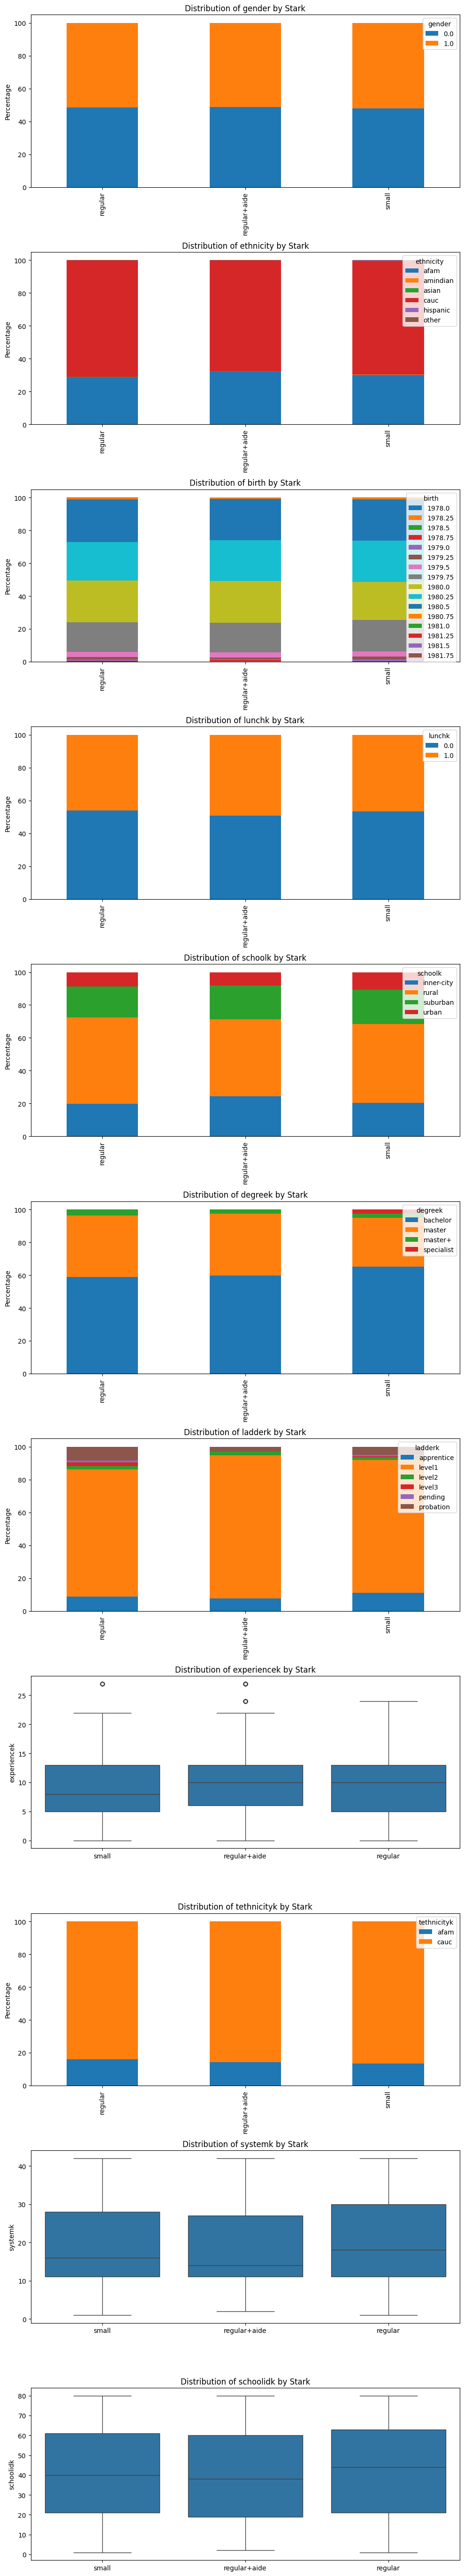

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# グラフを描画するための設定
num_columns = len(df_k.columns) - 3
fig, axes = plt.subplots(num_columns, 1, figsize=(10, 5 * num_columns))

# 各列に対して100%棒グラフを作成
i = 0
for column in df_k.columns:
    if column in ["experiencek", "systemk", "schoolidk"]:
        sns.boxplot(x='stark', y=column, data=df_k, ax=axes[i])
        axes[i].set_title(f'Distribution of {column} by Stark')
        axes[i].set_ylabel(column)
        axes[i].set_xlabel('')
        i += 1
    elif column not in ["stark", "readk", "mathk", "experiencek", "systemk", "schoolidk"]:
        distribution = df_k.groupby(['stark', column]).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
        distribution.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column} by Stark')
        axes[i].set_ylabel('Percentage')
        axes[i].set_xlabel('')
        axes[i].legend(title=column, loc='upper right')
        i += 1
    else:
        continue

plt.tight_layout()
plt.show()

## 4. Exploratory Data Analysis (EDA)

Perform EDA to understand the distribution and summary statistics of readk, mathk, and stark.

From this, three points were clarified:

- The number of students assigned to each class is almost equal, and thus there should be no major issues in comparison.

- The distributions of readk and mathk do not seem to follow a normal distribution.

- The scores for readk and mathk seem to differ by assigned class, with a noticeable difference particularly between students in small classes and those in regular classes.

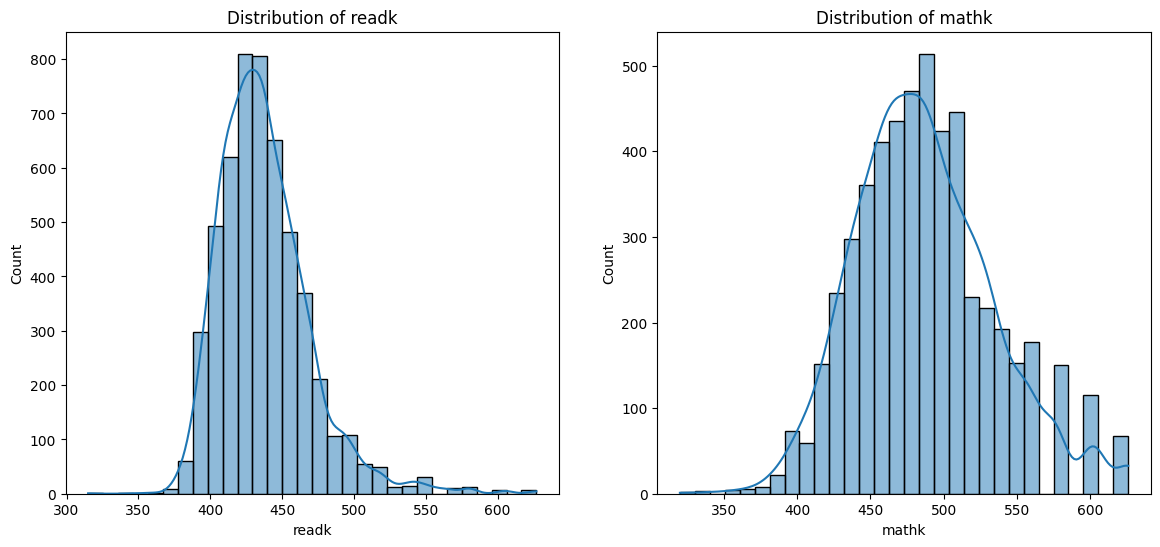

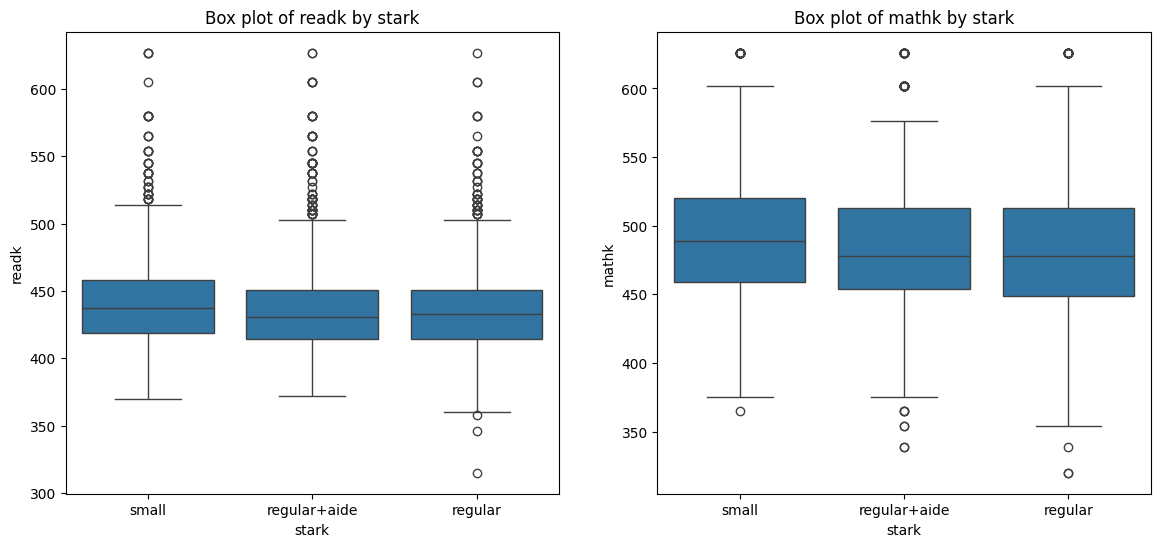

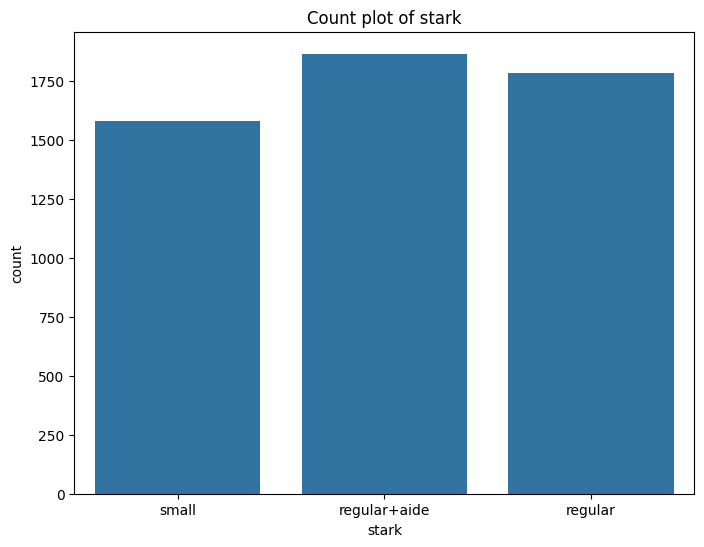

In [8]:
# Distribution plots for readk and mathk
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_k['readk'], kde=True, bins=30)
plt.title('Distribution of readk')

plt.subplot(1, 2, 2)
sns.histplot(df_k['mathk'], kde=True, bins=30)
plt.title('Distribution of mathk')

plt.show()

# Box plots to compare readk and mathk across different stark categories
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='stark', y='readk', data=df_k)
plt.title('Box plot of readk by stark')

plt.subplot(1, 2, 2)
sns.boxplot(x='stark', y='mathk', data=df_k)
plt.title('Box plot of mathk by stark')

plt.show()

# Count plot for stark to see the distribution of categories
plt.figure(figsize=(8, 6))
sns.countplot(x='stark', data=df_k)
plt.title('Count plot of stark')
plt.show()

In [9]:
# Calculate and display summary statistics for readk and mathk grouped by stark
summary_stats = df_k.groupby('stark')[['readk', 'mathk']].describe()
summary_stats

readk                                                     \
               count        mean        std    min    25%    50%    75%   
stark                                                                     
regular       1781.0  435.764177  31.087507  315.0  414.0  433.0  451.0   
regular+aide  1864.0  436.383584  32.267624  372.0  414.0  431.0  451.0   
small         1578.0  441.133714  32.284943  370.0  419.0  437.0  458.0   

                      mathk                                              \
                max   count        mean        std    min    25%    50%   
stark                                                                     
regular       627.0  1781.0  484.446378  47.575169  320.0  449.0  478.0   
regular+aide  627.0  1864.0  483.767704  46.726155  339.0  454.0  478.0   
small         627.0  1578.0  493.341572  49.620174  365.0  459.0  489.0   

                            
                75%    max  
stark                       
regular       513.0  626.0  
regular+aide  513.0  626.0  
small         520.0  626.0

## 5. Test for nomarlity of readk and mathk in each stark category

To determine if there are differences in the values of readk and mathk across categories, it is necessary to test whether readk and mathk in each category follow a normal distribution.

The results of the Shapiro-Wilk Test and the Kolmogorov-Smirnov Test indicated that readk and mathk in each category do not follow a normal distribution.


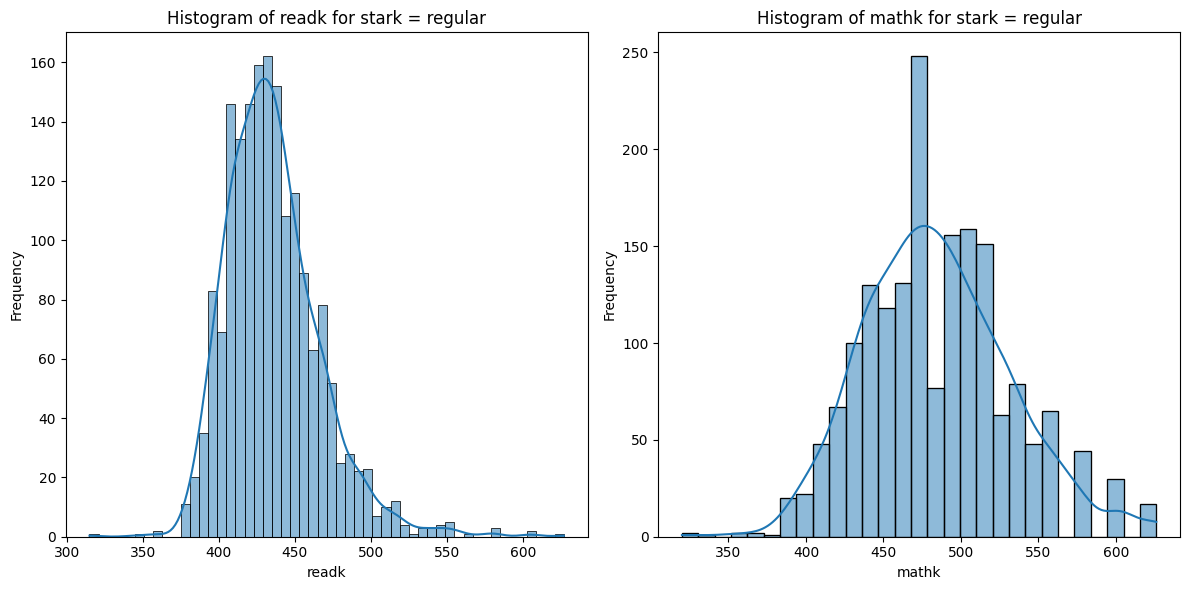

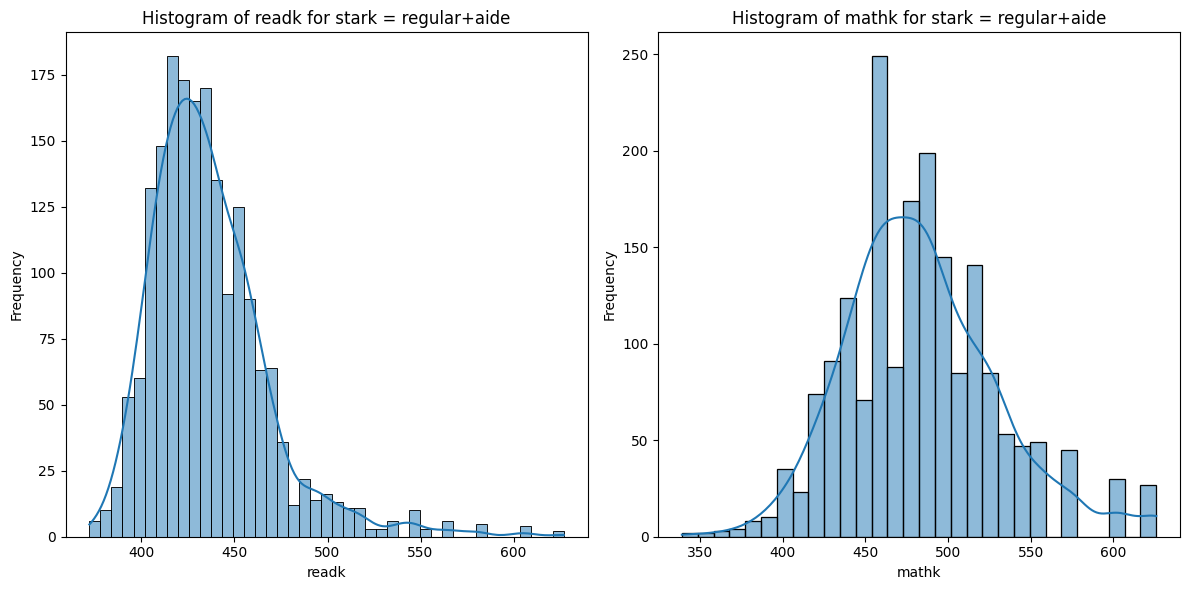

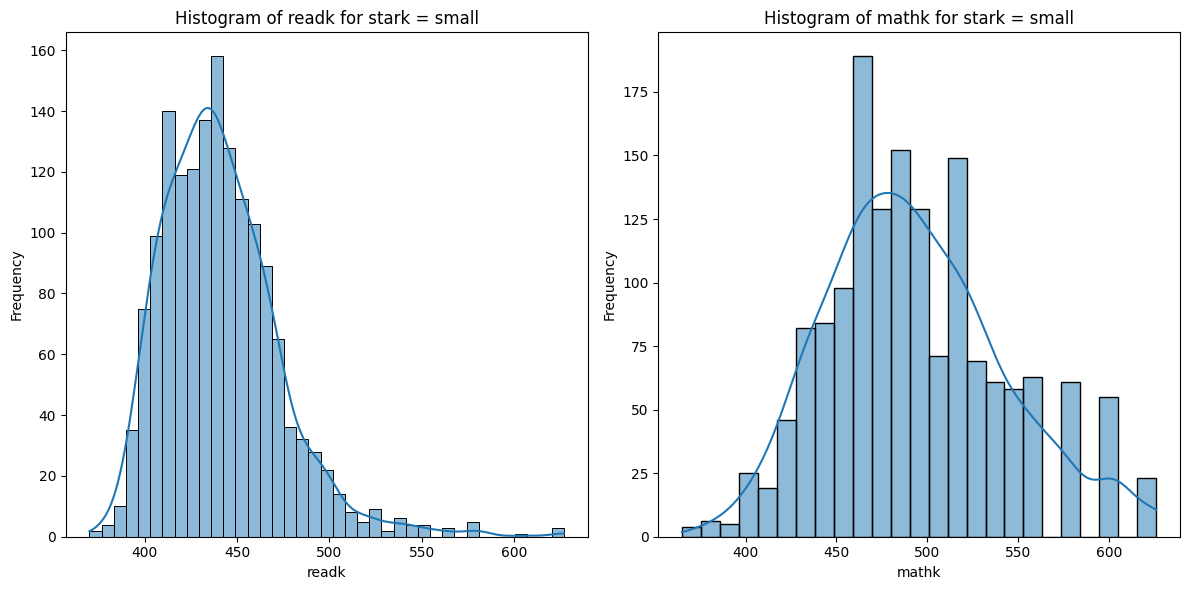

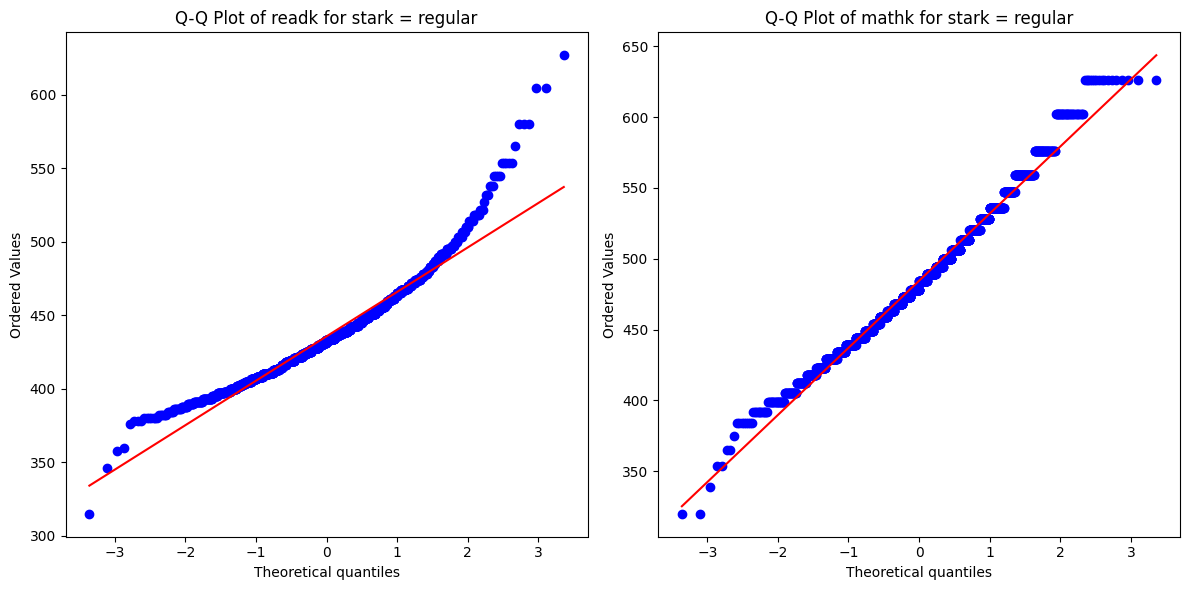

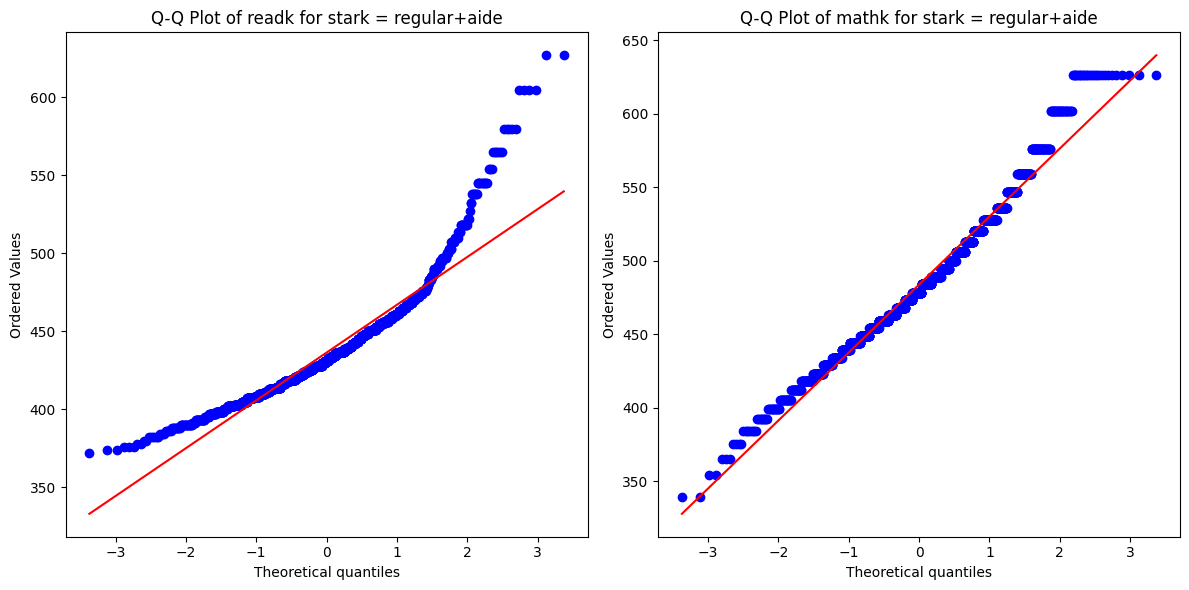

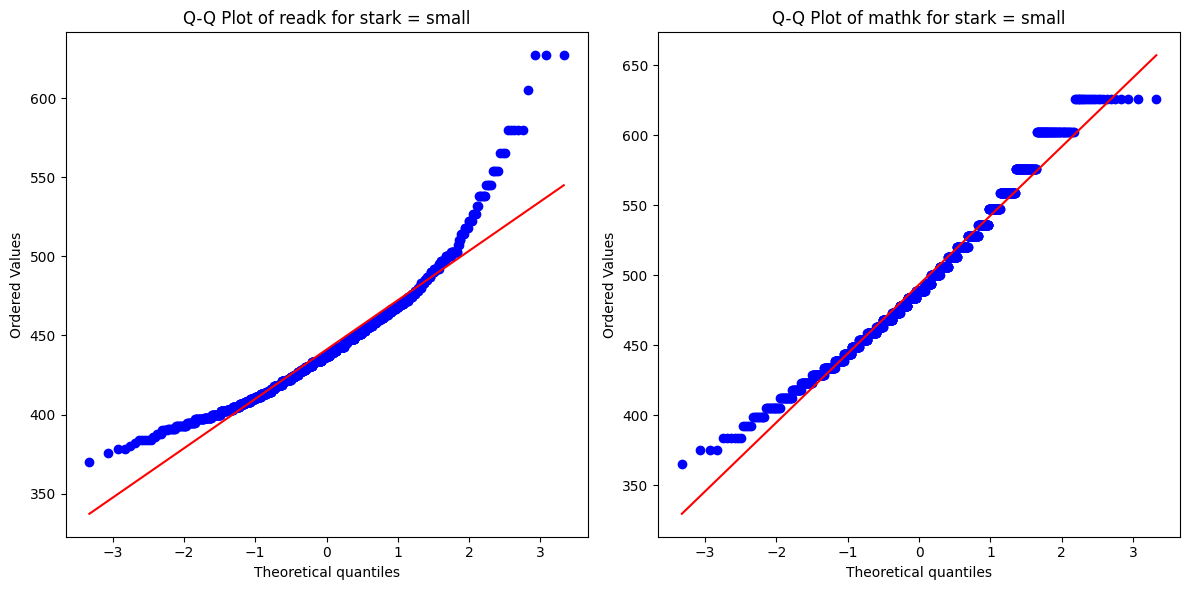

Shapiro-Wilk Test Results:
          stark variable         W       p-value
0       regular    readk  0.944306  2.167957e-25
1       regular    mathk  0.987747  3.717578e-11
2  regular+aide    readk  0.899734  2.839590e-33
3  regular+aide    mathk  0.976898  8.848115e-17
4         small    readk  0.930858  2.120232e-26
5         small    mathk  0.981133  1.522542e-13
Kolmogorov-Smirnov Test Results:
          stark variable         D       p-value
0       regular    readk  0.078947  4.211472e-10
1       regular    mathk  0.054733  4.449978e-05
2  regular+aide    readk  0.093794  1.010013e-14
3  regular+aide    mathk  0.077494  3.497287e-10
4         small    readk  0.072642  1.096052e-07
5         small    mathk  0.066547  1.609668e-06


In [11]:
from scipy import stats

# Group Data by `stark` Values
# Group the data by the values of the `stark` column.
grouped_data = df_k.groupby('stark')

# Visualize Distributions

# Create histograms for readk and mathk for each value of stark
for name, group in grouped_data:
    plt.figure(figsize=(12, 6))
    
    # Histogram for readk
    plt.subplot(1, 2, 1)
    sns.histplot(group['readk'], kde=True)
    plt.title(f'Histogram of readk for stark = {name}')
    plt.xlabel('readk')
    plt.ylabel('Frequency')
    
    # Histogram for mathk
    plt.subplot(1, 2, 2)
    sns.histplot(group['mathk'], kde=True)
    plt.title(f'Histogram of mathk for stark = {name}')
    plt.xlabel('mathk')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Create Q-Q plots for readk and mathk for each value of stark
for name, group in grouped_data:
    plt.figure(figsize=(12, 6))
    
    # Q-Q plot for readk
    plt.subplot(1, 2, 1)
    stats.probplot(group['readk'], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of readk for stark = {name}')
    
    # Q-Q plot for mathk
    plt.subplot(1, 2, 2)
    stats.probplot(group['mathk'], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of mathk for stark = {name}')
    
    plt.tight_layout()
    plt.show()

# Test for Normality

# Perform Shapiro-Wilk test for readk and mathk for each value of stark
shapiro_results = {'stark': [], 'variable': [], 'W': [], 'p-value': []}

for name, group in grouped_data:
    for variable in ['readk', 'mathk']:
        W, p_value = stats.shapiro(group[variable])
        shapiro_results['stark'].append(name)
        shapiro_results['variable'].append(variable)
        shapiro_results['W'].append(W)
        shapiro_results['p-value'].append(p_value)

shapiro_df = pd.DataFrame(shapiro_results)
print("Shapiro-Wilk Test Results:")
print(shapiro_df)

# Perform Kolmogorov-Smirnov test for readk and mathk for each value of stark
ks_results = {'stark': [], 'variable': [], 'D': [], 'p-value': []}

for name, group in grouped_data:
    for variable in ['readk', 'mathk']:
        D, p_value = stats.kstest(group[variable], 'norm', args=(group[variable].mean(), group[variable].std()))
        ks_results['stark'].append(name)
        ks_results['variable'].append(variable)
        ks_results['D'].append(D)
        ks_results['p-value'].append(p_value)

ks_df = pd.DataFrame(ks_results)
print("Kolmogorov-Smirnov Test Results:")
print(ks_df)

## 6. Non-Parametric Tests

Since it was determined that the data do not follow a normal distribution, we use the Kruskal-Wallis H-test to check for differences in the score distributions of each category.

The results of the Kruskal-Wallis H-test indicated that the score distributions of readk and mathk differ across categories.

In [12]:
# Non-Parametric Tests

# Perform Kruskal-Wallis H-test for readk
kruskal_readk = stats.kruskal(
    df_k[df_k['stark'] == 'small']['readk'],
    df_k[df_k['stark'] == 'regular']['readk'],
    df_k[df_k['stark'] == 'regular+aide']['readk']
)

# Perform Kruskal-Wallis H-test for mathk
kruskal_mathk = stats.kruskal(
    df_k[df_k['stark'] == 'small']['mathk'],
    df_k[df_k['stark'] == 'regular']['mathk'],
    df_k[df_k['stark'] == 'regular+aide']['mathk']
)

# Display the results of the Kruskal-Wallis H-tests
print("Kruskal-Wallis H-test for readk by stark categories:")
print(f"H-statistic: {kruskal_readk.statistic}, p-value: {kruskal_readk.pvalue}")

print("\nKruskal-Wallis H-test for mathk by stark categories:")
print(f"H-statistic: {kruskal_mathk.statistic}, p-value: {kruskal_mathk.pvalue}")

# If the p-value is less than 0.05, we reject the null hypothesis
if kruskal_readk.pvalue < 0.05:
    print("\nThe distributions of readk are significantly different across stark categories.")
else:
    print("\nThe distributions of readk are not significantly different across stark categories.")

if kruskal_mathk.pvalue < 0.05:
    print("The distributions of mathk are significantly different across stark categories.")
else:
    print("The distributions of mathk are not significantly different across stark categories.")

Kruskal-Wallis H-test for readk by stark categories:
H-statistic: 34.73007344314991, p-value: 2.8738253658928327e-08

Kruskal-Wallis H-test for mathk by stark categories:
H-statistic: 35.904419925067785, p-value: 1.597549322214287e-08

The distributions of readk are significantly different across stark categories.
The distributions of mathk are significantly different across stark categories.


## 7. OLS

I performed regression analysis using OLS to examine how much the scores of readk and mathk differ between the small and regular categories.

From these OLS results, it can be seen that the scores for readk and mathk increase when students are assigned to small classes.


In [ ]:
# OLS Regression

import statsmodels.api as sm
from tabulate import tabulate

df = df_k[df_k['stark'].isin(['small', 'regular'])]
df = df[["gender", "ethnicity", "birth", "readk", "mathk", "experiencek", "lunchk", "schoolk", "degreek", "ladderk", "tethnicityk", "stark"]]

df = pd.get_dummies(df, columns = ["ethnicity", "schoolk", "degreek", "ladderk", "tethnicityk"], drop_first = True)

df = df.replace({'stark': {'small': 1, 'regular': 0}})

df = df.astype(float)

X = df.drop(columns = ['readk', 'mathk'])
X = sm.add_constant(X)

y_readk = df['readk']
y_mathk = df['mathk']

model_readk = sm.OLS(y_readk, X)
results_readk = model_readk.fit()
OLSResults_readk = sm.regression.linear_model.OLSResults(model_readk, results_readk.params, model_readk.normalized_cov_params)
print(OLSResults_readk.summary())


model_mathk = sm.OLS(y_mathk, X)
results_mathk = model_mathk.fit()
OLSResults_mathk = sm.regression.linear_model.OLSResults(model_mathk, results_mathk.params, model_mathk.normalized_cov_params)
print(OLSResults_mathk.summary())

                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:                  readk   R-squared:                       0.136
    Model:                            OLS   Adj. R-squared:                  0.131
    Method:                 Least Squares   F-statistic:                     23.94
    Date:                Wed, 06 Nov 2024   Prob (F-statistic):           7.41e-90
    Time:                        11:55:45   Log-Likelihood:                -16136.
    No. Observations:                3359   AIC:                         3.232e+04
    Df Residuals:                    3336   BIC:                         3.246e+04
    Df Model:                          22                                         
    Covariance Type:            nonrobust                                         
    ======================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
    --------------------------------------------------------------------------------------
    const               1.015e+04   2953.477      3.435      0.001    4354.192    1.59e+04
    gender                -7.3771      1.031     -7.159      0.000      -9.398      -5.357
    birth                 -4.9025      1.491     -3.287      0.001      -7.827      -1.978
    experiencek            0.1306      0.110      1.188      0.235      -0.085       0.346
    lunchk               -14.1408      1.169    -12.096      0.000     -16.433     -11.849
    stark                  5.4995      1.047      5.251      0.000       3.446       7.553
    ethnicity_amindian   -21.9354     21.056     -1.042      0.298     -63.220      19.349
    ethnicity_asian        0.6670      9.540      0.070      0.944     -18.039      19.373
    ethnicity_cauc         7.4127      1.801      4.116      0.000       3.881      10.944
    ethnicity_hispanic    22.4138     17.224      1.301      0.193     -11.357      56.184
    ethnicity_other       -5.3757     14.912     -0.360      0.719     -34.613      23.862
    schoolk_rural         -2.7699      2.248     -1.232      0.218      -7.178       1.638
    schoolk_suburban       2.2423      2.143      1.046      0.296      -1.960       6.444
    schoolk_urban          2.2068      2.611      0.845      0.398      -2.912       7.326
    degreek_master        -5.8331      1.161     -5.022      0.000      -8.110      -3.556
    degreek_master+       -7.5259      3.063     -2.457      0.014     -13.531      -1.521
    degreek_specialist    -1.9167      4.925     -0.389      0.697     -11.574       7.740
    ladderk_level1         7.7858      2.075      3.752      0.000       3.717      11.855
    ladderk_level2        29.1058      4.292      6.782      0.000      20.691      37.521
    ladderk_level3        35.2930      4.779      7.386      0.000      25.924      44.662
    ladderk_pending        2.3579      5.515      0.428      0.669      -8.456      13.172
    ladderk_probation      3.9921      2.631      1.517      0.129      -1.167       9.152
    tethnicityk_cauc      -2.9098      1.758     -1.655      0.098      -6.357       0.537
    ==============================================================================
    Omnibus:                      779.286   Durbin-Watson:                   1.990
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2502.450
    Skew:                           1.162   Prob(JB):                         0.00
    Kurtosis:                       6.532   Cond. No.                     1.14e+07
    ==============================================================================

    Notes:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
    [2] The condition number is large, 1.14e+07. This might indicate that there are
    strong multicollinearity or other numerical problems.


                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:                  mathk   R-squared:                       0.109
    Model:                            OLS   Adj. R-squared:                  0.103
    Method:                 Least Squares   F-statistic:                     18.58
    Date:                Wed, 06 Nov 2024   Prob (F-statistic):           2.32e-68
    Time:                        11:55:45   Log-Likelihood:                -17627.
    No. Observations:                3359   AIC:                         3.530e+04
    Df Residuals:                    3336   BIC:                         3.544e+04
    Df Model:                          22                                         
    Covariance Type:            nonrobust                                         
    ======================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
    --------------------------------------------------------------------------------------
    const                2.87e+04   4602.887      6.236      0.000    1.97e+04    3.77e+04
    gender                -8.9138      1.606     -5.550      0.000     -12.063      -5.765
    birth                -14.2496      2.324     -6.130      0.000     -18.807      -9.692
    experiencek            0.0500      0.171      0.292      0.771      -0.286       0.386
    lunchk               -18.6673      1.822    -10.246      0.000     -22.239     -15.095
    stark                  8.8629      1.632      5.430      0.000       5.663      12.063
    ethnicity_amindian   -48.7574     32.816     -1.486      0.137    -113.098      15.583
    ethnicity_asian       -4.6454     14.868     -0.312      0.755     -33.798      24.507
    ethnicity_cauc         6.7547      2.807      2.406      0.016       1.251      12.258
    ethnicity_hispanic   -17.1830     26.843     -0.640      0.522     -69.813      35.447
    ethnicity_other      -16.4105     23.240     -0.706      0.480     -61.976      29.155
    schoolk_rural          4.4360      3.504      1.266      0.206      -2.434      11.306
    schoolk_suburban      10.1840      3.340      3.049      0.002       3.635      16.733
    schoolk_urban          2.5240      4.069      0.620      0.535      -5.454      10.502
    degreek_master        -9.7514      1.810     -5.387      0.000     -13.300      -6.202
    degreek_master+      -14.9803      4.773     -3.139      0.002     -24.338      -5.622
    degreek_specialist    10.4940      7.676      1.367      0.172      -4.556      25.544
    ladderk_level1        12.7073      3.234      3.929      0.000       6.366      19.049
    ladderk_level2        16.0493      6.689      2.399      0.016       2.935      29.164
    ladderk_level3        42.3824      7.447      5.691      0.000      27.781      56.984
    ladderk_pending        9.5760      8.596      1.114      0.265      -7.277      26.429
    ladderk_probation     11.8596      4.101      2.892      0.004       3.819      19.900
    tethnicityk_cauc      -8.4171      2.740     -3.072      0.002     -13.789      -3.045
    ==============================================================================
    Omnibus:                      109.865   Durbin-Watson:                   2.008
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.036
    Skew:                           0.454   Prob(JB):                     8.60e-27
    Kurtosis:                       3.180   Cond. No.                     1.14e+07
    ==============================================================================

    Notes:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
    [2] The condition number is large, 1.14e+07. This might indicate that there are
    strong multicollinearity or other numerical problems.